- stats.pdf issue: https://stackoverflow.com/questions/43602270/what-is-probability-density-function-in-the-context-of-scipy-stats-norm/43612986

- bayesian Rule
    - 목표는 모수 $\theta$의 분포를 찾는 것(not point estimation)
$$
P(\theta | y, x) = \dfrac{P(y | \theta, x) P(\theta|x)}{P(y|x)}
$$

In [31]:
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

- eg1.

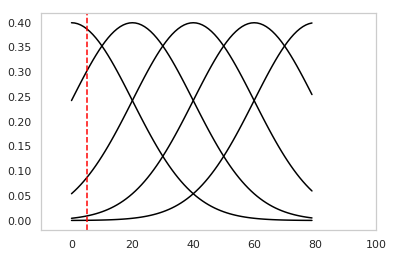

In [57]:
# mu값의 변화에 따른 pdf
# 원래는 어떤 x가 주어짐. 그리고 그것을 최대로하는 \theta를 선택하는 것이 MLE
example_x = 5
mu_ls = np.arange(4,9)
plt.plot(norm(mu_ls[0], sigma).pdf(np.arange(4, 8, 0.05)), color='black')
plt.plot(norm(mu_ls[1], sigma).pdf(np.arange(4, 8, 0.05)), color='black')
plt.plot(norm(mu_ls[2], sigma).pdf(np.arange(4, 8, 0.05)), color='black')
plt.plot(norm(mu_ls[3], sigma).pdf(np.arange(4, 8, 0.05)), color='black')
plt.plot(norm(mu_ls[4], sigma).pdf(np.arange(4, 8, 0.05)), color='black')
plt.axvline(example_x, linestyle='--', color='red')
plt.xlim(-10,100)
plt.grid(False)

- eg2.

In [60]:
# y, x는 정해짐
# L(\theta) = p(y|\theta, x) where theta=mu(with known variance)

y=7; sigma=1;
mu_0=5; sigma_0=2;

bayes_guess=6.5
mu_plot = np.arange(4, 8, 0.05) # xaxis=mu

likelihood = norm(mu_plot, sigma).pdf(y)
prior = norm(mu_0, sigma_0).pdf(mu_plot)

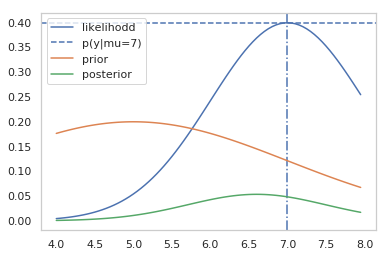

In [67]:
# likelihood
## y_axis = p(y=7|various mu) (mu=[4, 8))
## mu=7일 때 p(y|various mu)의 값이 당연히 가장 큼
plt.plot(mu_plot, norm(mu_plot, sigma).pdf(y), label='likelihodd')
plt.axhline(norm(7, sigma).pdf(y), linestyle='--', label='p(y|mu=7)')
plt.axvline(7, linestyle='-.',)

# prior
## mu ~ N(mu_0=5, sigma_0=2)
plt.plot(mu_plot, prior, label='prior') 

# posterior
plt.plot(mu_plot, likelihood*prior, label='posterior')

plt.legend()
plt.grid(False)

# posterior 구하는 방법
- Conjugate Priors, Sampling(MCMC, Gibbs sampling 등) 활용
- Conjugate Priors eg. 
    - $likelihood P(x|\mu) \sim N(\mu, \sigma^2) \to prior P(\mu) \sim N(\mu_0, \sigma_0^2)$
    - $posterior P(\mu|x) \propto P(x | \mu) P(\mu)$
    - posterior는 아래 분포를 따름:
        - $N( \dfrac{1} {\frac{1} {\sigma_0^2} + \frac{n} {\sigma^2}} \left ( \dfrac{\mu_0}{\sigma_0^2} + \dfrac{\sum{x_i}}{\sigma^2} \right ), \left( \dfrac{1}{\sigma_0^2} + \dfrac{n}{\sigma^22})^{-1} \right)$
    - prior variance $\sigma_0$이 커질수록, $\mu$ 추정시 observed data에 가중치를 더 줌
        - $\dfrac{\mu_0}{\sigma_0^2} \text{vs} \dfrac{\sum{x_i}}{\sigma^2}$